Source: https://github.com/suvoooo/Machine_Learning/tree/master/ExMax_ALgo

### Latent Variable Models 

In [2]:
import math
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd

[<AxesSubplot:> <AxesSubplot:>]


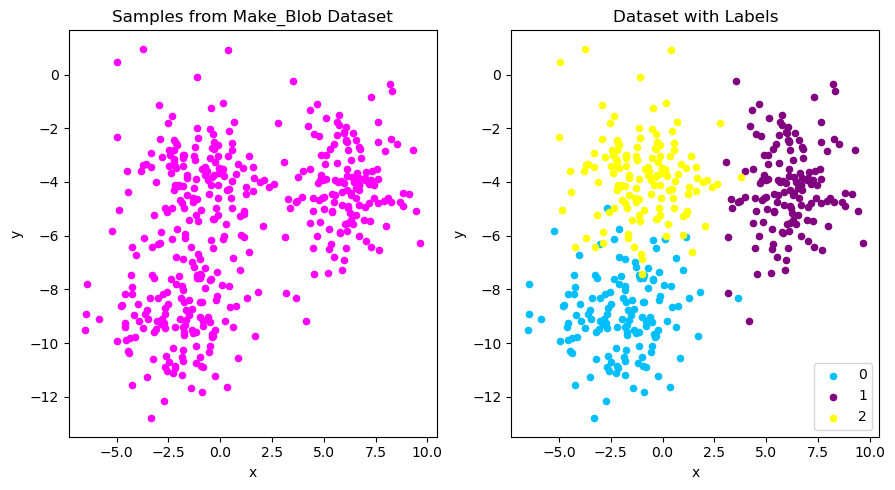

In [3]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=420, centers=3, n_features=2, random_state=40, cluster_std=1.6)

df = pd.DataFrame(dict(x = X[:, 0], y = X[:, 1], label=y))

colors = {0:'magenta', 1:'magenta', 2:'magenta'}
colors_1 = {0:'DeepSkyBlue', 1:'purple', 2:'yellow'}
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(9, 5))
print (axes)
grouped = df.groupby('label')
for key, group in grouped:
  group.plot(ax=axes[0], kind='scatter', x='x', y='y', color=colors[key]) #label=key)
  group.plot(ax=axes[1], kind='scatter', x='x', y='y', color=colors_1[key], label=key)  

axes[1].set_title('Dataset with Labels', fontsize=12)
axes[0].set_title('Samples from Make_Blob Dataset', fontsize=12)
plt.tight_layout()
plt.show()

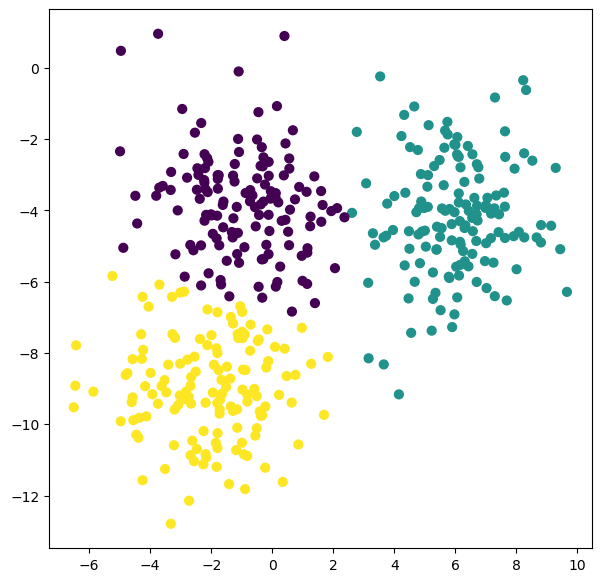

In [4]:
### Use the same data-set and Use K-Means 
from sklearn.cluster import KMeans
X, y = make_blobs(n_samples=420, centers=3, n_features=2, random_state=40, cluster_std=1.6)# same as before

kmeans = KMeans(3, random_state=0)
lab_K = kmeans.fit(X).predict(X)

fig = plt.figure(figsize=(7, 7))
plt.scatter(X[:, 0], X[:, 1], c=lab_K, s=40, cmap='viridis')
plt.show()

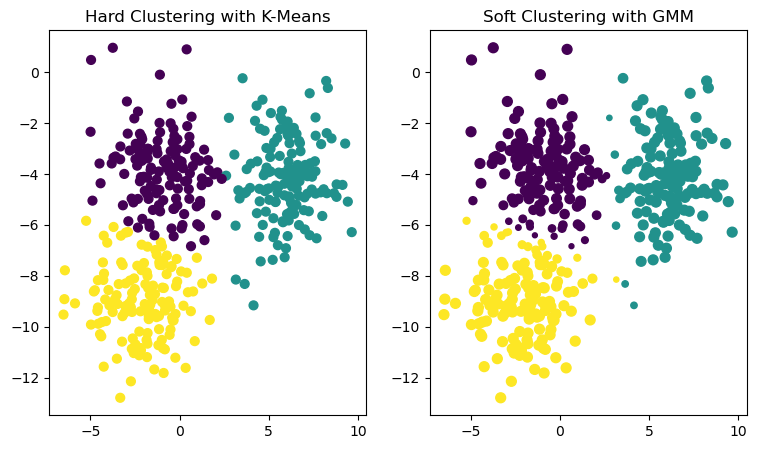

In [5]:
### Use the Same Make Blobs Model  But Now Gaussian Mix Model 
from sklearn.mixture import GaussianMixture
X, y = make_blobs(n_samples=420, centers=3, n_features=2, random_state=40, cluster_std=1.6)# same as before
# X = X[:, ::-1]
gmm = GaussianMixture(n_components=3).fit(X)
labels = gmm.predict(X)

probabs = gmm.predict_proba(X)
sizes = 50* (probabs.max(1)**2)


fig = plt.figure(figsize=(9, 5))
plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], c=lab_K, s=40, cmap='viridis')
plt.title("Hard Clustering with K-Means")

plt.subplot(1, 2, 2)
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=sizes)
plt.title("Soft Clustering with GMM")
# plt.savefig('/content/gdrive/My Drive/KMeans_GMM.png', dpi=200)
plt.show()

#### Multivariate Gaussian Distribution 

For a vector valued random variable $X = [X_1, X_2, ..., X_n]^T$, multivariate Gaussian distribution is defined as: 

$p(x: \mu, \Sigma) = \frac{1}{\left(2\pi \right) ^{\frac{n}{2}} \Sigma ^{\frac{1}{2}}}\, \text{exp}\, \left(-\frac{1}{2} (x-\mu)^T \Sigma ^{-1} (x-\mu) \right)$, 

where $\mu \in \mathbb{R} ^n$ is the mean and $\Sigma \in S^n_{++}$ is the covariance matrix. $S^n_{++}$ is the space of symmetric positive definite $n\times n$ matrices defined as -- 

$S^n_{++} = \{A\in \mathbb{R} ^{n\times n} : A = A^T \text{and}\, x^TAx>0\, \text{for all}\, x\in \mathbb{R}^n\, \text{such that}\,  $x $\neq$ 0 $\}$. 
________________________________________________

#### GMM 

Let's think of linear superposition of Gaussian components as a model distribution, then-- 

$p(x) = \sum \limits_{k} \pi _k \mathcal{N}\left(x|\mu _k, \Sigma _k \right); \, \pi _k $ is the weight of the mixture component $k$. 

Considering K-dimensional binary random variable $\pmb{z}$ with 1 of K representation, in which a particular element $z_k \in \{0, 1\}$ and $\sum \limits_k z_k = 1 $. 

Marginal distribution over $\pmb{z}$ is specified in terms of the mixing coefficients $\pi _k$, such that 

$p(z_k = 1) = \pi_k$; under the conditions $0\leq \pi_k \leq 1$ and $\sum _k \pi _k = 1$. 

Combining the multivariate Gaussian and latent prior we can write 

$p(x) = \sum \limits_k p(z_k = 1)\, p\left(x| z_k=1 \right) = \sum_k \pi _k \mathcal{N} (x|\mu_k, \sum _k)$. 

As $\pmb{z}$ uses 1 of K representation we can write it in another form and corresponding conditional distribution would look like

$p(\pmb{z}) = \prod \limits_k \, {\pi _k}^{z_k};\, \,  p(\pmb{x}|\pmb{z}) = \prod _k \, \mathcal{N} (\pmb{x}|\mu_k, \sum _k)^{z_k}$.

From the conditional distribution we can derive the _responsibility_ $\gamma (z_k)$ using Bayes' theorem--

$\gamma (z_k) \equiv p(z_k=1|\pmb{x}) = \frac{p(z_k =1)\, p(\pmb{x}|z_k=1)}{\sum \limits_{j=1}^{K} p(z_j =1)\, p(\pmb{x}|z_j=1)} = \frac{\pi _k \, \mathcal{N} (x|\mu_k, \Sigma _k)}{\sum \limits_{j=1}^{K} \pi _j\, \mathcal{N} (x|\mu_j, \Sigma _j)}$. 

It is important here to note that in case of GMM even though the latent variables are never observed but it is possible to calculate the full posterior distribution. This term is known as responsibility because we can think of this as the responsibility the component $k$ takes for observation of $x$. 

---------------------------------------------------------------------

For a dataset $X$ with $N$ training sample i.e. $X = \{x_1, x_2,..., x_N\}$, the log likelihood function will be given by-- 

$\text{ln}\, p\left(X|\pi, \mu , \Sigma \right) = \sum \limits_n \text{ln} \, \left(\sum _k   \pi _k \mathcal{N} (x_n|\mu_k, \Sigma _k \right); \, \text{w.r.t}\,  \Theta \left(\pi _k, \mu _k, \Sigma _k\right)$.

Logarithm is applied on the sum of the mixtures and not on the Gaussian. !!! Problem !!! 

However, using the cluster assignments (_responsibilities_) and setting the derivatives of $\text{ln}\, p\left(\pmb{X}|\pmb{\pi} , \, \pmb{\mu} , \, \pmb{\Sigma }\right)$ w.r.t to the parameters we can obtain --

$\mu _k = \frac{1}{N_k} \sum \limits_{n=1}^{N} \gamma (z_{nk})\, x_n$; where $N_k = \sum \limits_{n=1}^{N} \gamma (z_{nk})$. 

$\Sigma _k = \frac{1}{N_k} \sum \limits_{n=1}^{N} \gamma (z_{nk})\, (x_n-\mu _k)\, (x_n - \mu _k)^{\text{T}}$. 

$\pi _k = \frac{N_k}{N}$. 

Think $N_k$ as effective number of points assigned to cluster $k$. Also we must think of these assignments as soft assignments, because a hard assignment would be obtained as $z^* = \text{argmax}\, p(z|x) $. This is what is done in K-Means clustering.  

It is important to note that the expressions we obtained for $\mu _k, \Sigma _k, \pi _k$ do not constitute a closed-form solution because the responsibilities $\left(\gamma (z_{nk}) \right)$ depend on the parameters itself. But what this suggests is: if we build up an iterative scheme, starting by choosing some initial values of the parameters, it is possible to find a solution to the MLE propblem.   

Introduce Expectation Maximization algorithm to solve the soft assignment problem iteratively.  


### EM Algorithm 

General steps of EM algorithm-- 

1. Choose initial values of the parameters; $\Theta ^{\text{old}} = \{\pmb{\pi, \mu , \Sigma} \}$. 
2. E-step: Evaluate $p(\pmb{z}|\pmb{X}, \Theta ^{\text{old}})$. 
3. Using the posterior, obtain the expectation of the complete data likelihood : 

$Q(\Theta , \Theta ^{\text{old}}) = \sum \limits_Z p(\pmb{Z}|\pmb{X}, \Theta ^{\text{old}})\, \text{log}\, p(\pmb {X, Z}|\Theta) = \mathbb{E} _{p(\pmb{Z}|\pmb{X},\, \Theta ^{\text{old}})}\, \text{log}\, p(\pmb {X, Z}|\Theta)$  

4. M-Step: The expectation is then maximized w.r.t to the parameter $\Theta$, resulting in the new updated parameters-- 

$\Theta ^{new} = \text{argmax}\, Q(\Theta , \Theta ^{old})$. 

5. Iterate and look for convergence. If not converged go back to step 2. 

### Variational Lower Bound: EM Algorithm General 

As we have assumed before for every observable variable there's one associated latent variable, i.e, for every $x_n$ there is a $z_n$ and the complete matrix $\pmb{Z}$ would be $N\times K$ dimensional where there are $N$ number of observed data points and $K$ is the number of clusters. 
 
The maximum likelihood problem would have been lot easier if $z_n$ for every $x_n$ is known. 
$\text{ln}\, p(\pmb{X}|\Theta) = \sum \limits _{i=1}^{N}  \text{ln}\, p(x_i, z_i|\Theta) = \sum \limits _{i=1}^{N} \text{ln}\, p(x_i|z_i,\Theta)\, + \text{ln}\, p(z_i)$

From previous discussion, for $N$ data-points the maximum log likelihood takes a complex form as below-- 

$\text{ln}\, p(X|\Theta) = \text{ln}\, \prod \limits _{i=1}^N p(x_i|\Theta) = \sum\limits _{i=1}^N \text{ln}\, p(x_i|\Theta) = \sum\limits _{i=1}^N \text{ln}\, \sum \limits_z p(x_i, z_i|\Theta)$  .......(1)

We remember where we started from, for a single data point-- 
$p(x) = \sum \limits_z p(z)\, p(x|z) = \sum \limits_k \pi _k\, \mathcal{N}(x|\mu_k, \Sigma_k)$

Our main idea is to send the log inside the sum in equation 1. Here we introduce arbitrary distribution $q(z)$ (no particular property) for a latent variable $z$. We modify the above expression a little bit--

$\text{ln}\, p(X|\Theta) = \sum \limits_N \text{ln}\, \sum \limits _z q_i(z_i)\,  \frac{p(x_i, z_{i}| \Theta)}{q_i(z_i)}\, \, $       ...(2)

This can be written in terms of the expected value as below -- 



Note: $q(z)$ is normalized distribution that sums to 1, i.e. $\sum \limits _z q(z) = 1$

$\text{ln}\, p(X|\Theta) = \sum \limits _N \text{ln}\, {\mathbb{E}_{z_i\sim q_i}} \left[\frac{p(x_i, \, z_i|\Theta)}{q(z_i)} \right]\, ; \text{using}\, E[\cdot] = \int [\cdot]\,  p(x)\, dx$

The expectation term can be read as expected value of $z_i$, drawn from distribution $q_i$. 

We know that logarithmic function is concave and we can apply [Jensen's Inequality](https://en.wikipedia.org/wiki/Jensen%27s_inequality).  For a concave function $f$ the Jensen Inequality can be written as $f({\mathbb{E}_{p(t)}}\, [x]) \geq {\mathbb{E}_{p(t)}}\, [f(x)]$. For a convex function the inequality will be opposite. 

Using Jensen's Inequality we can rewrite it -- 

$\text{ln}\, p(X|\Theta) = \sum \limits_N  \text{ln}\, {\mathbb{E}_{z_i \sim q_i}}\left[\frac{p(x_i, \, z_i|\Theta)}{q(z_i)} \right] \geq \sum \limits_N {\mathbb{E}_{z_i\sim q_i}} \left[\text{ln}\,\frac{p(x_i, \, z_i|\Theta)}{q({z_i})}\right]\, \, $ ;    Using      $f({\mathbb{E}_{p(t)}}\, [x]) \geq {\mathbb{E}_{p(t)}}\, [f(x)]$....(3)

 

For all the observations the above expression for the Expectation can be written as -- 

${\mathbb{E}_{z\sim q}}\, \left[\text{ln}\,\frac{p(X, \, Z|\Theta)}{q(Z)}\right] $ and this is known as Evidence Lower Bound (ELBO). 
Expanding the logarithm term inside the expectation we get --   

ELBO $= l(\Theta , q)={\mathbb{E}_{z\sim q(z)}} [\text{ln}\, p(X, Z) - \text{ln}\, q(Z)] = {\mathbb{E}_{z\sim q(z)}} [\text{ln}\, p(Z|X) + \text{ln}\, p(X) - \text{ln}\, q(Z)]$. 

Since all the expectations are taken w.r.t to $q(z)$, we rewrite -- 

ELBO $= - {\mathbb{E}_{q(\pmb{Z})}} [\text{ln}\, q(\pmb{Z}) - \text{ln}\, p(\pmb{Z}|\pmb{X})] + \text{ln}\, p(\pmb{X}) $ 

If we use the definition of KL divergence we can simplify the above expression even more -- 

ELBO $= \text{ln}\, p(X) - \text{KL}\, \left(q(Z)|| p(Z|X)\right)$ ...(4)

As our goal is to maximize the data likelihood $i.e. \text{ln}\, p(X|\Theta)$ and since KL Divergence $\geq 0$ always, the above equation tells that maximizing the ELBO is equivalent to minimizing the KL divergence between true posterior $p(Z|X)$ and our assumed generic distribution of latent variables $q(Z)$. 

 
So let's summarize the EM steps from a more general perspective. 

1. Consider the current value of parameter is designated as $\Theta ^{\text{old}}$. Start the algorithm by randomly initializing the parameters. 
2. E Step: Maximize the ELBO w.r.t. $q(Z)$ and $\Theta ^{\text{old}}$ is kept fixed. Since $\text{ln}\, p(X)$ is independent of $q(Z)$, this suggests that ELBO is max when $q(Z) = p(\pmb{Z}|X, \Theta)$. 
3. M-Step: ELBO is maximized w.r.t. $\Theta$ and $q(Z)$ is kept fixed. This is like MLE estimation and it gives us $\Theta ^{\text{new}}$. 
4. If ELBO is not at max then $\Theta ^{\text{new}}$ will increase the ELBO. This makes sure that increase in $\text{ln}\, p(X)$ is greater than increase in ELBO. Because, $q(Z)$ was obtained for $\Theta ^{\text{old}}$ and thus the $p(Z|X, \Theta ^{\text{new}})$ and $q(Z)$ are definitely not same and thus KL divergence is $\geq 0$.  

So this is how the iterative process progresses until convergence and EM algo ensures that log-likelihood monotonically improves. This could be used for checking bugs in code because the log likelihood must increase at each step. 

In case of GMM, the posterior distribution can be analytically computed but in complex problem this will be extremely difficult and most of the times intractable. Thus E-step calculation and subsequently M-step calculation wouldn't be possible. So the idea would be to find $q$ from a family of $\mathcal{Q}$'s. This is the basis of variational inference and variational autoencoder.   

For the derivation of formula for the parameters $\pi, \mu, \Sigma$ for GMM always refer the [Andrew Ng's notes](http://cs229.stanford.edu/notes/cs229-notes8.pdf). For a different approach you can also check his Stanford Lecture videos.  


#### Use the EM Steps for GMM 
 

samples folder:  <numpy.lib.npyio.NpzFile object at 0x7f6da5d976d0>
data shape:  (280, 2)


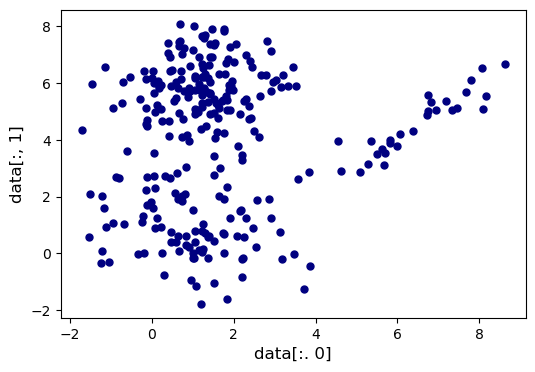

In [7]:
# Load the samples using numpy load.
samples_folder = np.load('./resources/samples.npz')
print ("samples folder: ", samples_folder)
data = samples_folder['data']
print ("data shape: ", data.shape)
data_0 = data[:, 0]
data_1 = data[:, 1]
fig = plt.figure(figsize=(6, 4))
plt.plot(data_0, data_1, linestyle='None', marker='o', markersize=5, color='navy')
plt.xlabel('data[:. 0]', fontsize=12)
plt.ylabel('data[:, 1]', fontsize=12)
plt.show()

In [8]:
pi0 = samples_folder['pi0']
mu0 = samples_folder['mu0']
sigma0 = samples_folder['sigma0']

print ("check the shape of pi0, mu0, sigma0 :", pi0.shape, mu0.shape, sigma0.shape) # possibly 3 clusters 
print ("check some values of pi0: ", pi0)
print ("check some values of mu0: ", '\n', mu0, '\n')
print ("check some values of sigma0: ", '\n', sigma0)

check the shape of pi0, mu0, sigma0 : (3,) (3, 2) (3, 2, 2)
check some values of pi0:  [0.3451814  0.6066179  0.04820071]
check some values of mu0:  
 [[-0.71336192  0.90635089]
 [ 0.76623673  0.82605407]
 [-1.32368279 -1.75244452]] 

check some values of sigma0:  
 [[[ 1.00490413  1.89980228]
  [ 1.89980228  4.18354574]]

 [[ 1.96867815  0.78415336]
  [ 0.78415336  1.83319942]]

 [[ 0.19316335 -0.11648642]
  [-0.11648642  1.98395967]]]


Few Steps to review before applying EM Algo to GMM --  
1. For Multivariate Normal use [Scipy Multivariate Norm](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.multivariate_normal.html).
2. E step in GMM is setting the assumed distribution of latent variables $q(z)$ to the posterior $p(z|x, \theta)$. 
3. We have previously defined the posterior $\gamma (z_k) = p(z_k=1|x)$. So the value of the responsibility associated with data point $x_n$ would be given by $\gamma (z_{nk})$. 
4. Recall the definition of responsibility -- 

$\gamma (z_k) \equiv p(z_k=1|\pmb{x}) = \frac{p(z_k =1)\, p(\pmb{x}|z_k=1)}{\sum \limits_{j=1}^{K} p(z_j =1)\, p(\pmb{x}|z_j=1)} = \frac{\pi _k \, \mathcal{N} (x|\mu_k, \Sigma _k)}{\sum \limits_{j=1}^{K} \pi _j\, \mathcal{N} (x|\mu_j, \Sigma _j)}$.

5. M-step is maximzing the expectation of the complete data likelihood : $\mathbb{E} _{p(\pmb{Z}|\pmb{X},\, \Theta ^{\text{old}})}\, \text{log}\, p(\pmb {X, Z}|\Theta)$. This maximization is done w.r.t the parameters $\Theta$. Before we have already written the formulas for the parameters $(\mu _k, \pi_k, \Sigma _k)$ and we will use them. Also it is important to remember that in M-step the parameters are updated. These updated parameters are then used to calculate the new posterior in E-step.   

In [9]:
#### E step for GMM 
### Use multivariate normal for Gaussian distribution 
from scipy.stats import multivariate_normal

def E_step(data, pi, mu, sigma):
  N = data.shape[0] # number of data-points
  K = pi.shape[0] # number of clusters, following notation used before in description  
  d = mu.shape[1] # dimension of each data point, think of these as attributes
  gamma = np.zeros((N, K)) # this is basically responsibility which should be equal to posterior. 

  for nk in range(K):
    gamma[:, nk] = pi[nk] * multivariate_normal.pdf(data, mean=mu[nk], cov=sigma[nk]) 
    # calculate responsibility for each cluster
  gamma = gamma/np.sum(gamma, axis=1, keepdims=True) 
  # use the sum over all the clusters, thus axis=1. Denominator term. 
  # print ("gamma shape: ", gamma.shape)
  return gamma 

In [10]:
def M_step(data, gamma):
  N, D = data.shape 
  K = gamma.shape[1] # use the posterior shape calculated in E-step to determine the no. of clusters  
  pi = np.zeros(K)
  mu = np.zeros((K, D))
  sigma = np.zeros((K, D, D)) 

  for ik in range(K):
    n_k = gamma[:, ik].sum() # we use the definintion of N_k 
    pi[ik] = n_k/N # definition of the weights
    elements = np.reshape(gamma[:, ik], (gamma.shape[0], 1)) 
    # get each columns and reshape it (K, 1) form so that later broadcasting is possible. 
    mu[ik,:] = (np.multiply( elements,  data)).sum(axis=0) / n_k  
    sigma_sum = 0.
    for i in range(N):
      var = data[i] - mu[ik]
      sigma_sum = sigma_sum + gamma[i, ik] * np.outer(var, var)# outer product creates the covariance matrix
    sigma[ik,:] = sigma_sum/n_k    
  return pi, mu, sigma

#### Maximize loss function : Maximize the ELBO. 
In EM algo as explained above we deal with the Evidence lower bound and maximize the lower bound so that the likelihood monotonically increases. Let's recall the definition of lower bound, we started from -- 

$\text{ln}\, p(X|\Theta) = \sum \limits_N \text{ln}\, \sum \limits _z q(z_{i})\,  \frac{p(x_i, z_i| \Theta)}{q(z_{i})}$.

Then applied the definition of expectation and later applied Jensen's equality to arrive into the form below--

$\text{ln}\, p(X|\Theta) = \sum \limits_N  \text{ln}\, {\mathbb{E}_{z_i\sim q_i}}\left[\frac{p(x_i, \, z_i|\Theta)}{q(z_i)} \right] \geq \sum \limits_N {\mathbb{E}_{z_i\sim q_i}} \left[\text{ln}\,\frac{p(x_i, \, z_i|\Theta)}{q({z_i})}\right]$


Using the definition of Expectation we re-write the above formula 

Loss $=$ ELBO $= \sum \limits_{i=1}^{N} \sum \limits_{k=1}^{K} q(z_{ik})\, \left[\text{ln}\, p(x_i,z_{i}=k)  - \text{ln}\, q(z_{ik})\right]$

Using the formula of joint distribution -- $p(x, z) = p(x|z)\, p(z)$ 

ELBO $= \sum \limits_{i=1}^{N} \sum \limits_{k=1}^{K} q(z_{ik})\, \left[\text{ln}\, p(x_i|z_{i}=k) +  \text{ln}\, p(z_{i}=k) - \text{ln}\, q(z_{ik}) \right]$

We will use this expression to define the loss function and also use the fact that in GMM the true posterior $p(z|x)$ can be analytically computed and this is set to be equal to $q(z)$, as mentioned before.   

In [11]:
def elbo(data, gamma, pi, mu, sigma):
  N = data.shape[0] # no. of data-points
  K = gamma.shape[1] # no. of clusters
  d = data.shape[1] # dim. of each object

  loss = 0.
  for i in range(N):
      x = data[i]
      for k in range(K):
        pos_dist = gamma[i, k] ## p(z_i=k|x) = gamma_ik
        log_lik = np.log(multivariate_normal.pdf(x, mean=mu[k, :], cov=sigma[k, :, :]) + 1e-20) # log p(x|z)
        log_q = np.log(gamma[i, k] + 1e-20) # log q(z) = log p(z_i=k|x)
        log_pz = np.log(pi[k] + 1e-20)  # log p(z_k =1) =\pi _k
        loss = (loss + np.multiply(pos_dist, log_pz) + np.multiply(pos_dist, log_lik) +  
        np.multiply(pos_dist, -log_q) )
  #print ("check loss: ", loss)

  return loss    

#### Start the Training 

We have defined E-Step, M-Step and also the lower bound (loss). Now we will create the training loop.  
One thing to remember that the loss might get stuck in a local maxima and to reduce this possibility we need to re-run the training for different starting values. 

Since the loss increases monotonically, we stop training when the improvement rate is below some tolerance rate.  

In [12]:
def train_loop(data, K, tolerance=1e-3, max_iter=50, restart=10):
  N, d = data.shape
  elbo_best = -np.inf # loss set to the lowest value 
  pi_best = None
  mu_best = None
  sigma_best = None
  gamma_f = None
  for _ in range(restart):
    pi = np.ones(K) / K # if 3 clusters then an array of [.33, .33, .33] # the sum of pi's should be one 
    # that's why normalized  
    mu = np.random.rand(K, d) # no condition on 
    sigma = np.tile(np.eye(d), (K, 1, 1)) # to initialize sigma we first start with ones only at the diagonals
    # the sigmas are postive semi-definite and symmetric  
    last_iter_loss = None
    all_losses = []
    try:

      for i in range(max_iter):
        gamma = E_step(data, pi, mu, sigma)
        pi, mu, sigma = M_step(data, gamma)
        loss = elbo(data, gamma, pi, mu, sigma)
        if loss > elbo_best:
          elbo_best = loss
          pi_best = pi 
          mu_best = mu
          sigma_best = sigma
          gamma_f = gamma
        if last_iter_loss and abs((loss-last_iter_loss)/last_iter_loss) < tolerance: # insignificant improvement
          break 
        last_iter_loss = loss
        all_losses.append(loss)
    except np.linalg.LinAlgError: # avoid the delta function situation 
      pass 

  return elbo_best, pi_best, mu_best, sigma_best, all_losses, gamma_f    

In [13]:
best_loss, pi_best, mu_best, sigma_best, ls_lst, final_posterior = train_loop(data, 3)

In [14]:
print ("starting loss, best_loss: ", ls_lst[0], ',',  best_loss)
print ("best pi", pi_best) 
print ("best mu: ", mu_best)

print ("best sigma: ", sigma_best)

starting loss, best_loss:  -1220.5696825504351 , -1063.9034543902476
best pi [0.10887866 0.33931772 0.55180362]
best mu:  [[6.2465544  4.39332636]
 [0.91109789 0.95547087]
 [1.22325777 5.82595404]]
best sigma:  [[[ 1.85938655  1.50537951]
  [ 1.50537951  1.40797373]]

 [[ 1.48951009 -0.38818441]
  [-0.38818441  1.41501414]]

 [[ 0.94244398  0.0667696 ]
  [ 0.0667696   1.11512312]]]


In [15]:
print("what about final posterior; ", final_posterior.shape)
print ("check one of the values: ", final_posterior[5, :])

what about final posterior;  (280, 3)
check one of the values:  [1.10782586e-07 2.21985265e-01 7.78014624e-01]


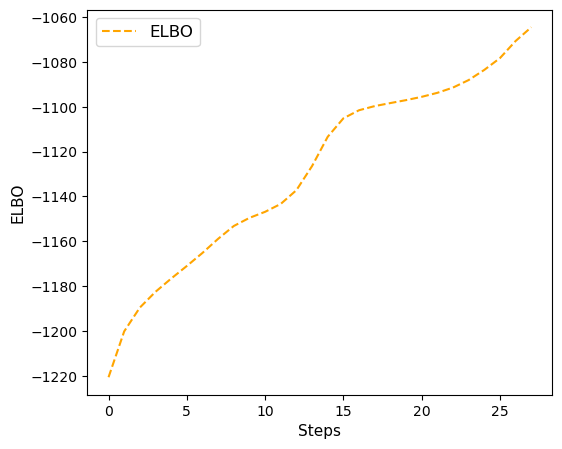

In [16]:
fig = plt.figure(figsize=(6,5))
plt.plot(range(len(ls_lst)), ls_lst, linestyle='--', color='orange', label='ELBO')
plt.xlabel('Steps', fontsize=11)
plt.ylabel('ELBO', fontsize=11)
plt.legend(fontsize=12)

#### Number of Components  
Using AIC, a very elegant way number of components (clusters) can be deteminded and an example is given [here](http://ethen8181.github.io/machine-learning/clustering/GMM/GMM.html). Also, it is mentioned in Bishop's book that it is quite common to run K-Means to find suitable intialization values of the parameters for GMM. It is due to the high computation in each steps and number of steps required to reach convergence.   

#### Implement Using Scikit Learn 

We can bypass all of the understandings by implementing GMM using Scikit-learn with 4 lines of codes. Here's the [GMM page](https://scikit-learn.org/stable/modules/generated/sklearn.mixture.GaussianMixture.html) in Sklearn. 

In [17]:
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=3, n_init=10)
gmm.fit(data)

GaussianMixture(n_components=3, n_init=10)

In [18]:
print ("using sklearn")
print ("best pi : ", gmm.weights_)

print ("best mu :", gmm.means_)

using sklearn
best pi :  [0.10685277 0.55100617 0.34214106]
best mu : [[6.30978007 4.44084974]
 [1.2215991  5.82962808]
 [0.92634336 0.96642033]]


#### Plot Contours
We can use te scikit learn GMM attributes to plot the contours. 
We will make a comparison how the contour changes from first iteration to the last (best elbo). 
 

In [19]:
def plot_contours(data, means, covs):
    """visualize the gaussian components over the data"""
    plt.figure()
    plt.plot(data[:, 0], data[:, 1], 'ko')

    delta = 0.025
    k = means.shape[0]
    x = np.arange(-2.5, 10.0, delta)
    y = np.arange(-2.5, 10.0, delta)
    x_grid, y_grid = np.meshgrid(x, y)
    coordinates = np.array([x_grid.ravel(), y_grid.ravel()]).T

    col = ['green', 'red', 'indigo']
    for i in range(k):
        mean = means[i]
        cov = covs[i]
        z_grid = multivariate_normal(mean, cov).pdf(coordinates).reshape(x_grid.shape)
        plt.contour(x_grid, y_grid, z_grid, colors = col[i])
    plt.tight_layout()

In [20]:
print ("check whether the best one converged: ", gmm.converged_)
print ("how many steps to convergence: ", gmm.n_iter_)

check whether the best one converged:  True
how many steps to convergence:  3


<Figure size 800x600 with 0 Axes>

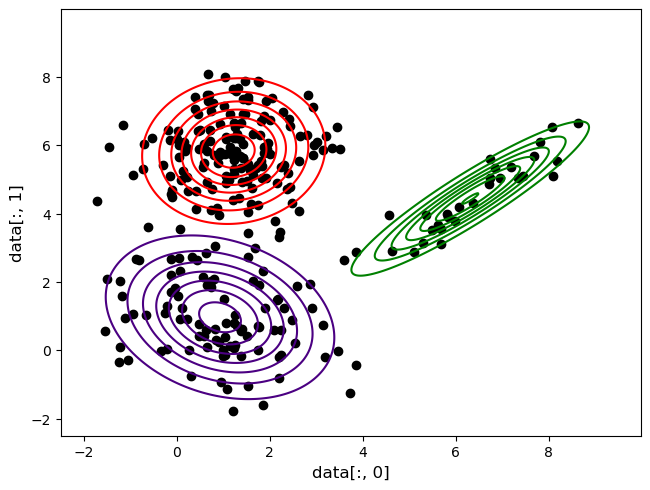

In [21]:
fig= plt.figure(figsize=(8, 6))
plot_contours(data, gmm.means_, gmm.covariances_)
plt.xlabel("data[:, 0]", fontsize=12)
plt.ylabel("data[:, 1]", fontsize=12)
plt.show()